# Titanic Survival Predictions
---
##### The problem statement for this project is to find out what is the best prediction model and the best predictor to predict the survival rate of the passengers on the Titanic. 

##### One of the reasons that the shipwreck led to many loss of life was due to the lack of lifeboats for the passengers and crew. Although there were some element of luck involved in surviving, some groups of people were more likely to survive than others, such as women, children and the upper-class.

##### We applied tools of machine learning to predict which passengers survived the tragedy.

### Contents:
1. Import required libraries<br>
2. Importing data
3. Data Preparations
4. Data Visualization and Analysis
5. Split Training and Test data
6. Choosing the best model
7. Finding individual predictor that best predict survival
8. Comparing Sex vs Survival on actual test data
9. Conclusion

### Import required libraries

In [1]:
import numpy as np
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
sb.set() #sets the default seaborn style for graphics

### Importing Data 

In [2]:
# Load file into dataframe
titanic_train_data = pd.read_csv('titanic_train.csv')

#print the first 5 rows
titanic_train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#info of data
titanic_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# Check number of missing values in each column
titanic_train_data.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##### As seen above, Age, Cabin and Embarked have missing values

# Data Preparations
## Handling Missing Values

---

##### To handle the missing values above, each case needs to be handled differently

1. Age - replace missing values with mean so as to reduce effect on titanic_train_data
2. Cabin - remove entire column as majority of the values are missing
3. Embarked - replace missing values with most common value to reduce effect on titanic_train_data

In [5]:
# Remove Cabin from titanic_train_data
titanic_train_data = titanic_train_data.drop(columns='Cabin',axis = 1)

In [6]:
# First mean value of Age
print(titanic_train_data['Age'].mean())

29.69911764705882


In [7]:
# Replace missing values in Age with the mean value
titanic_train_data['Age'].fillna(titanic_train_data['Age'].mean(), inplace = True)

In [8]:
# Find mode value of Embarked
print(titanic_train_data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [9]:
## Replace missing values in Age with the mean value
titanic_train_data['Embarked'].fillna(titanic_train_data['Embarked'].mode()[0], inplace = True)

In [10]:
# Check that missing values were handled correctly 
titanic_train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [11]:
# Check number of missing values in each column
titanic_train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Converting Catergorical Values to Integers
----
Sex - male -> 0, female -> 1<br>

Embarked - Southhampton -> 0, Queenstown -> 1, Cherbourg ->2<br>

Separating the age into age groups:<br>
Age &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; | Group<br>
0-16 &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;| 0<br> 
17-32 &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;| 1<br> 
33-48 &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;| 2<br> 
49-64 &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;| 3<br>
more than 64&ensp;&ensp;| 4<br> 

In [12]:
# Converting categorical Columns
titanic_train_data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'Q':1,'C':2}}, inplace=True)

In [13]:
# Show AgeBand when it is split evenly according to data
titanic_train_data['AgeBand'] = pd.cut(titanic_train_data['Age'], 5)
titanic_train_data[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.344168
2,"(32.252, 48.168]",0.404255
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [14]:
# Sorts Age to a new age ranges
titanic_train_data.loc[titanic_train_data['Age'] <= 16, 'Age'] = 0
titanic_train_data.loc[(titanic_train_data['Age'] > 16) & (titanic_train_data['Age'] <= 32), 'Age'] = 1
titanic_train_data.loc[(titanic_train_data['Age'] > 32) & (titanic_train_data['Age'] <= 48), 'Age'] = 2
titanic_train_data.loc[(titanic_train_data['Age'] > 48) & (titanic_train_data['Age'] <= 64), 'Age'] = 3
titanic_train_data.loc[ titanic_train_data['Age'] > 64, 'Age'] = 4
titanic_train_data['Age'] = titanic_train_data['Age'].astype(int)

In [15]:
# Show FareBand when it is split evenly according to data
titanic_train_data['FareBand'] = pd.qcut(titanic_train_data['Fare'], 4)
titanic_train_data[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [16]:
# Sorts Age to a new fare range
titanic_train_data.loc[titanic_train_data['Fare'] <= 7.91, 'Fare'] = 0
titanic_train_data.loc[(titanic_train_data['Fare'] > 7.91) & (titanic_train_data['Fare'] <= 14.454), 'Fare'] = 1
titanic_train_data.loc[(titanic_train_data['Fare'] > 14.454) & (titanic_train_data['Fare'] <= 31), 'Fare'] = 2
titanic_train_data.loc[titanic_train_data['Fare'] > 31 , 'Fare'] = 3
titanic_train_data['Fare'] = titanic_train_data['Fare'].astype(int)

In [17]:
titanic_train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeBand,FareBand
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,0,0,"(16.336, 32.252]","(-0.001, 7.91]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,3,2,"(32.252, 48.168]","(31.0, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,1,0,"(16.336, 32.252]","(7.91, 14.454]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,3,0,"(32.252, 48.168]","(31.0, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,1,0,"(32.252, 48.168]","(7.91, 14.454]"


## Data Cleaning (Removing uneccessary info)
---

#### Passenger ID is not required as it holds no substance.
#### Ticket values vary too much with characters and numbers that dont represent anything and can be removed.
#### Name can also be removed due to its insignificance

In [18]:
# Remove PassengerID and Ticket from dataset
titanic_train_data =titanic_train_data.drop(columns='PassengerId',axis = 1)
titanic_train_data =titanic_train_data.drop(columns='AgeBand',axis = 1)
titanic_train_data =titanic_train_data.drop(columns='FareBand',axis = 1)
titanic_train_data =titanic_train_data.drop(columns='Ticket',axis = 1)
titanic_train_data = titanic_train_data.drop(columns='Name',axis = 1)

In [19]:
titanic_train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,1,1,0,0,0
1,1,1,1,2,1,0,3,2
2,1,3,1,1,0,0,1,0
3,1,1,1,2,1,0,3,0
4,0,3,0,2,0,0,1,0


## Finding individual predictor that best predicts the survival of passengers
#### For this section, we will be splitting our predictors into their individual dataframe and using the same confusion matrix function above to predict the survival using Random Forest Classification

In [49]:
# Splitting of data
x=titanic_train_data[["Pclass","Sex","Fare"]]
y=titanic_train_data["Survived"]

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.25)

Classification Accuracy in train data 	: 0.6736526946107785
Classification Accuracy in test data 	: 0.695067264573991
True Positive Rate for train	: 0.4122137404580153
False Positive Rate for train	: 0.15763546798029557
True Positive Rate for test	: 0.35
False Positive Rate for test	: 0.11188811188811189


69.51

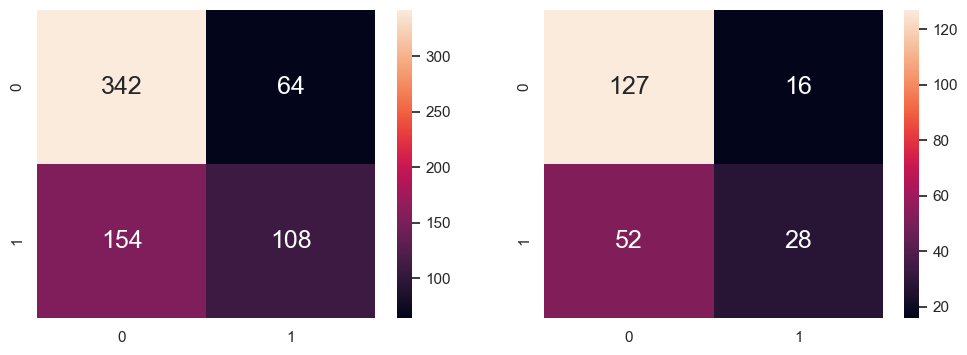

In [50]:
# Pclass vs Survived Confusion Matrix
Pclass_train = pd.DataFrame(X_train['Pclass'])
Pclass_test = pd.DataFrame(X_test['Pclass'])
Pclass_train.value_counts(sort=False)

randomforest = RandomForestClassifier()
randomforest.fit(Pclass_train, Y_train)
confusionMatrix(Pclass_train,Y_train,Pclass_test,Y_test,randomforest)

Classification Accuracy in train data 	: 0.8083832335329342
Classification Accuracy in test data 	: 0.7219730941704036
True Positive Rate for train	: 0.6450381679389313
False Positive Rate for train	: 0.08620689655172414
True Positive Rate for test	: 0.45
False Positive Rate for test	: 0.1258741258741259


72.2

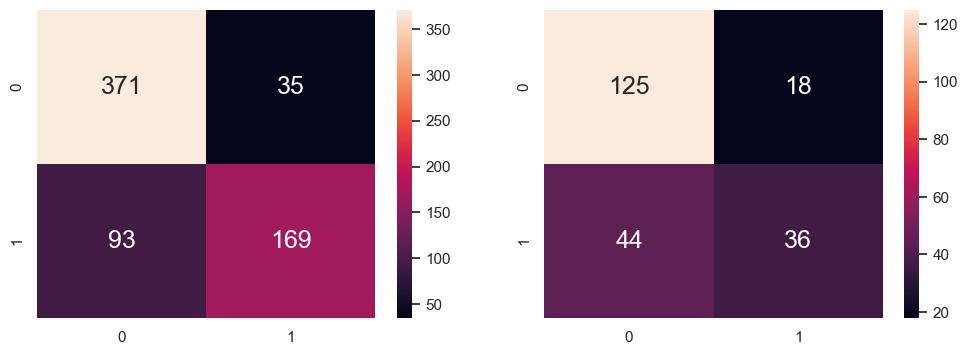

In [71]:
# Fare vs Survived Confusion Matrix
Fare_train = pd.DataFrame(X_train['Fare'])
Fare_test = pd.DataFrame(X_test['Fare'])
Fare_train.value_counts(sort=False)

randomforest = RandomForestClassifier()
randomforest.fit(Fare_train, Y_train)
confusionMatrix(Fare_train,Y_train,Fare_test,Y_test,randomforest)

Classification Accuracy in train data 	: 0.7694610778443114
Classification Accuracy in test data 	: 0.8385650224215246
True Positive Rate for train	: 0.6679389312977099
False Positive Rate for train	: 0.16502463054187191
True Positive Rate for test	: 0.725
False Positive Rate for test	: 0.0979020979020979


83.86

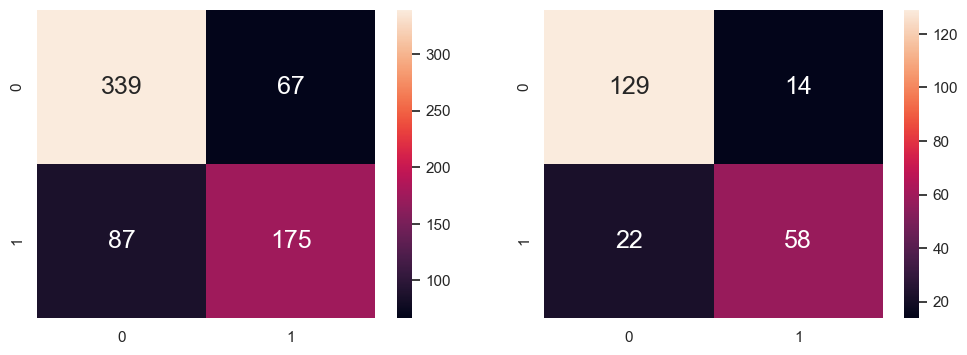

In [59]:
# Sex vs Survived Confusion Matrix
Sex_train = pd.DataFrame(X_train['Sex'])
Sex_test = pd.DataFrame(X_test['Sex'])
Sex_train.value_counts(sort=False)

randomforest = RandomForestClassifier()
randomforest.fit(Sex_train, Y_train)
confusionMatrix(Sex_train,Y_train,Sex_test,Y_test,randomforest)

#### From the tables above, our analysis demonstrates that Sex emerges as the standout predictor for prediction accuracy in the test dataset, boasting an impressive 83.9% accuracy rate. This far exceeds the accuracy rates of the other variables, Pclass and Fare, which stand at only 69.5% and 72.2% respectively.

#### After all our analysis, we found out that utilizing the random forest classification with Sex as the defining predictor that offers the most reliable prediction of the Titanic's survival rates. 



## Comparing Sex vs Survived On Actual Test Data

#### Next, we will be using Random Forest Classification with Sex as the predictor to predict the survival rate on Actual Test Data

We will first begin off by importing the train and test data again and cleaning them to obtain the required 'Sex' and 'Survived' variables<br>Following that, we will then continue on with the prediction using the official train and test data


In [95]:
# Rereading entire train and test data
titanic_train_data = pd.read_csv('titanic_train.csv')
titanic_test_data = pd.read_csv('titanic_test.csv')
titanic_test_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,996,1,3,"Thomas, Mrs. Alexander (Thamine Thelma"")""",female,16.0,1,1,2625,8.5167,NaN,C
1,1175,1,3,"Touma, Miss. Maria Youssef",female,9.0,1,1,2650,15.2458,NaN,C
2,1225,0,3,"Nakid, Mrs. Said (Waika Mary"" Mowad)""",female,19.0,1,1,2653,15.7417,NaN,C
3,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
4,1141,1,3,"Khalil, Mrs. Betros (Zahie Maria"" Elias)""",female,NaN,1,0,2660,14.4542,NaN,C


In [96]:
# Replacing Female and Male with 1 and 0
titanic_train_data.replace({'Sex':{'male':0,'female':1}}, inplace=True)
titanic_test_data.replace({'Sex':{'male':0,'female':1}}, inplace=True)
titanic_train_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


C:\Users\yixia\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Classification Accuracy in train data 	: 0.7867564534231201
Classification Accuracy in test data 	: 0.7607655502392344
True Positive Rate for train	: 0.6812865497076024
False Positive Rate for train	: 0.14754098360655737
True Positive Rate for test	: 0.6547619047619048
False Positive Rate for test	: 0.168


76.08

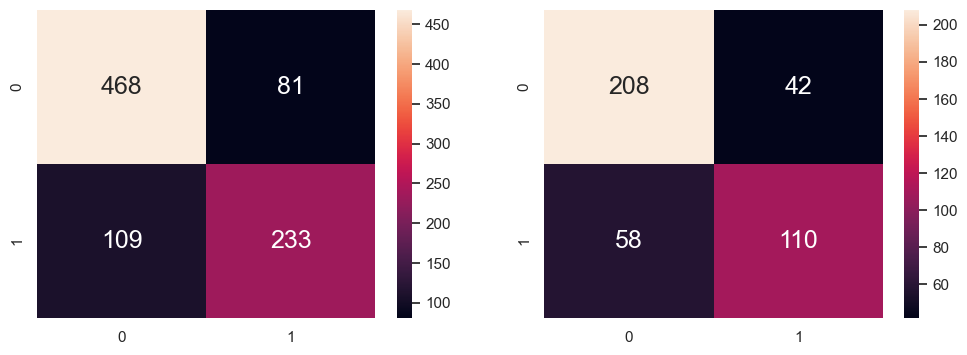

In [97]:
# Extracting Sex and Survived from both train and test data
x_actual_train = pd.DataFrame(titanic_train_data["Sex"])
x_actual_test = pd.DataFrame(titanic_test_data["Sex"])
y_actual_train = pd.DataFrame(titanic_train_data["Survived"])
y_actual_test = pd.DataFrame(titanic_test_data["Survived"])

# Random Forest Classification on Sex vs Survived
randomforest = RandomForestClassifier()
randomforest.fit(x_actual_train, y_actual_train)
confusionMatrix(x_actual_train,y_actual_train,x_actual_test,y_actual_test,randomforest)

As seen from the confusion matrix above, although the results obtained from the outcome of our test data isn't as accurate with a results of (76.1%) as the results obtained from the training data (83.9%), there is still a good accuracy and justifies our conclusion that Sex the best predictor for predicting survival rate.

## Conclusions

Through the entire course the project, there are clear conclusions that we were able to draw from analyzing the datasets provided.

1. It is clear to use that out of all the different Prediction models we've used, we have found that Random Forest Classification method has the highest accuracy for predicting the Survival of the people in our data set.

2. We have also found that 3 predictors played an impactful part in the predictions, which are Sex,Pclass and Fare. With Sex being the best predictor out of the 3.

3. One special case would be evidence of people aged 16 had a higher chance of survival when comparing to other ages based on the proportion of their sample size. This means that in general the youngest age group (age below 16) has a higher chance of survival.

In terms of what these conclusions tells us about the dataset, we can conclude that during the tragic accident on the Titanic, woman and children's safety and wellbeing was prioritized, which would have explained the data we used.
